<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
0.00021552306189847502 0.00019794795160240922

ANN: Train MSE = 0.000216

ANN: Test MSE = 0.000198


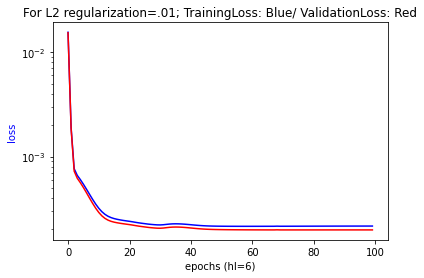

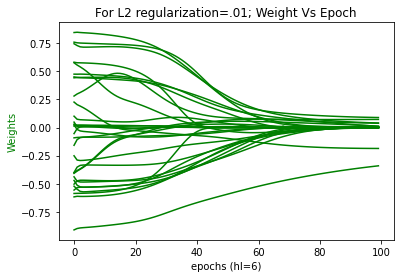

In [ ]:
from numpy.lib.function_base import average
from re import U
from sklearn import tree
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import pydot
import graphviz
import pandas as pd
import pydotplus
import collections
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier


from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import validation_curve


fileName = "Census_Supplement.xlsx"

dataFrame= pd.read_excel(fileName, usecols="I,M,P,R,H")

x=dataFrame.drop(["HDIVVAL"],axis=1)
scalerX = MinMaxScaler()
scalerX.fit(x)
x = scalerX.transform(x)
print(type(dataFrame))
print(type(x))

y=dataFrame.drop(["AGI","A_AGE","A_SEX","WKSWORK"],axis=1)

scalerY= MinMaxScaler()
scalerY.fit(y)
y=scalerY.transform(y)

print(type(y))
y=np.ravel(y)

g

hl = (6)
clf = MLPRegressor(hidden_layer_sizes=hl, activation='tanh', solver='adam',alpha=.01, early_stopping=False, max_iter=1000, validation_fraction=0, random_state=42)

trainingLoss = []
validationLoss = []
weights=[]
weightfinalvalue=[]
for epoch in range(100):
  clf.partial_fit(trainX,trainY)
  #print(clf.coefs_)
  weightvalues=np.ravel(clf.coefs_[0])
  weightvaluessecond=np.ravel(clf.coefs_[1])
  weightfinalvalue.append(np.concatenate((weightvalues, weightvaluessecond), axis=None))


  trainmse=mean_squared_error(trainY,clf.predict(trainX))
  testmse=mean_squared_error(testY,clf.predict(testX))

  trainingLoss.append(trainmse)
  validationLoss.append(testmse)


trainmse=mean_squared_error(trainY,clf.predict(trainX))
testmse=mean_squared_error(testY,clf.predict(testX))


print(trainmse,testmse)

print("\n\rANN: Train MSE = %f" % trainmse)
print("\n\rANN: Test MSE = %f" % testmse)

xlabel ="epochs (hl=" + str(hl) + ")"
fig,ax = plt.subplots()

ax.plot(trainingLoss, color="blue")
plt.title("For L2 regularization=.01; TrainingLoss: Blue/ ValidationLoss: Red")
#ax.plot(weightfinalvalue, color="blue")

ax.set_xlabel(xlabel,fontsize=10)
ax.set_ylabel("loss",color="blue",fontsize=10)
ax.plot(validationLoss,color="red")
ax.set_yscale('log')
plt.show()


fig,ay = plt.subplots()

ay.plot(weightfinalvalue, color="green")
plt.title("For L2 regularization=.01; Weight Vs Epoch")


ay.set_xlabel("epochs (hl=" + str(hl) + ")",fontsize=10)
ay.set_ylabel("Weights",color="green",fontsize=10)


plt.show()
